In [57]:
import pandas as pd
import numpy as np
from itertools import product
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
config = {
    "model_saves":"model_saves",
    "artifacts_dir":"artifacts",
}

In [50]:
def get_base_clf_results(config):
    ALL_FEAT = ["AAC","DPC","CTD",
                "PAAC","APAAC","RSacid",
                "RSpolar","RSsecond","RScharge",
                "RSDHP"]
    model_dir = config["model_saves"]
    model_set = list(set([x.split("_")[0] for x in os.listdir(model_dir)]))
    
    metrics = {"model":[],"feature":[]}
    for m,f in product(model_set,ALL_FEAT):
        if not os.path.exists(os.path.join(model_dir,f"{m}_{f}","metrics.json")):
            continue
        
        with open(os.path.join(model_dir,f"{m}_{f}","metrics.json"),"r") as f0:
            data = json.load(f0)
            
        for k in data.keys():
            try:
                metrics[k].append(data[k])
            except KeyError:
                metrics[k] = [data[k]]
        
        metrics["model"].append(m)
        metrics["feature"].append(f)
                    
    metric_df = pd.DataFrame.from_dict(metrics,orient="columns")
    
    return metric_df
    

In [51]:
metrics = get_base_clf_results(config)
metrics

,model,feature,accuracy,precision,recall,f1,sensitivity,specificity
0,SVC,AAC,0.893391,0.893564,0.892897,0.893157,0.879804,0.905989
1,SVC,DPC,0.896932,0.897317,0.896308,0.896670,0.879804,0.912813
2,SVC,CTD,0.856019,0.855878,0.855694,0.855777,0.847097,0.864291
3,SVC,PAAC,0.885523,0.887235,0.884274,0.885015,0.851186,0.917362
4,SVC,APAAC,0.883950,0.885562,0.882728,0.883447,0.850368,0.915087
...,...,...,...,...,...,...,...,...
65,LinearRegression,RSacid,0.868607,0.868996,0.869431,0.868591,0.891251,0.847612
66,LinearRegression,RSpolar,0.871361,0.871775,0.872204,0.871347,0.894522,0.849886
67,LinearRegression,RSsecond,0.859953,0.861039,0.861122,0.859952,0.892069,0.830174
68,LinearRegression,RScharge,0.870181,0.870952,0.871216,0.870177,0.898610,0.843821


In [52]:
metrics.to_csv(os.path.join(config["artifacts_dir"],"base_clf_results.csv"),index=False)

In [54]:
metrics = metrics.set_index(["model","feature"])
metrics

accuracy  precision    recall        f1   
model            feature                                             
SVC              AAC       0.893391   0.893564  0.892897  0.893157  \
                 DPC       0.896932   0.897317  0.896308  0.896670   
                 CTD       0.856019   0.855878  0.855694  0.855777   
                 PAAC      0.885523   0.887235  0.884274  0.885015   
                 APAAC     0.883950   0.885562  0.882728  0.883447   
...                             ...        ...       ...       ...   
LinearRegression RSacid    0.868607   0.868996  0.869431  0.868591   
                 RSpolar   0.871361   0.871775  0.872204  0.871347   
                 RSsecond  0.859953   0.861039  0.861122  0.859952   
                 RScharge  0.870181   0.870952  0.871216  0.870177   
                 RSDHP     0.870181   0.870722  0.871097  0.870171   

                           sensitivity  specificity  
model            feature                             
SVC              AAC          0.879804     0.905989  
                 DPC          0.879804     0.912813  
                 CTD          0.847097     0.864291  
                 PAAC         0.851186     0.917362  
                 APAAC        0.850368     0.915087  
...                                ...          ...  
LinearRegression RSacid       0.891251     0.847612  
                 RSpolar      0.894522     0.849886  
                 RSsecond     0.892069     0.830174  
                 RScharge     0.898610     0.843821  
                 RSDHP        0.895339     0.846854  

[70 rows x 6 columns]

In [55]:
metrics["accuracy"].unstack()

feature,AAC,APAAC,CTD,DPC,PAAC,RSDHP,RSacid,RScharge,RSpolar,RSsecond
model,,,,,,,,,,
ExtraTreesClassifier,0.882769,0.872148,0.822974,0.849725,0.876475,0.883950,0.881196,0.883950,0.881196,0.881983
KNN,0.810779,0.805665,0.760425,0.765932,0.826121,0.810779,0.805665,0.806845,0.809992,0.807238
LGBMClassifier,0.883163,0.879622,0.861920,0.874902,0.884736,0.887490,0.889457,0.888670,0.881589,0.883556
LinearRegression,0.845791,0.850905,0.845791,0.840677,0.847364,0.870181,0.868607,0.870181,0.871361,0.859953
RF,0.880803,0.874115,0.819827,0.848151,0.878836,0.878442,0.882376,0.881983,0.884343,0.881983
SVC,0.893391,0.883950,0.856019,0.896932,0.885523,0.895358,0.897325,0.895751,0.897718,0.897718
XGBClassifier,0.802124,0.773407,0.785995,0.720299,0.780488,0.785208,0.787569,0.799764,0.782455,0.797010


<Axes: xlabel='feature', ylabel='model'>

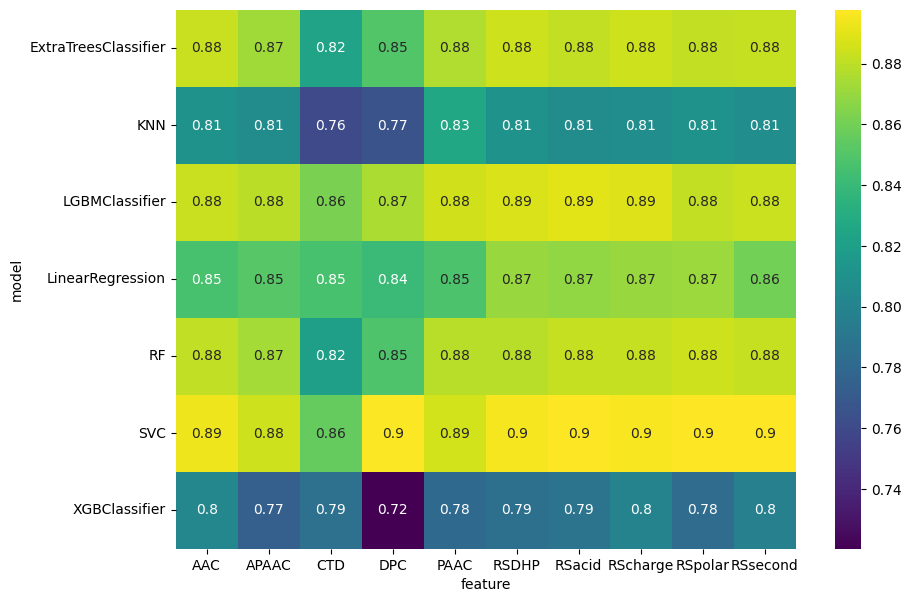

In [62]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(metrics["accuracy"].unstack(), annot=True,cmap=sns.color_palette("viridis", as_cmap=True),ax=ax)

In [45]:
metrics["f1"].unstack()

feature,AAC,APAAC,CTD,DPC,PAAC,RSDHP,RSacid,RScharge,RSpolar,RSsecond
model,,,,,,,,,,
ExtraTreesClassifier,0.882499,0.871929,0.822592,0.849623,0.876217,0.883641,0.880922,0.883677,0.880922,0.881701
KNN,0.810127,0.802167,0.760402,0.764631,0.823250,0.810468,0.804930,0.806214,0.809956,0.806764
LGBMClassifier,0.882955,0.879421,0.861552,0.874641,0.884532,0.887255,0.889222,0.888409,0.881355,0.883338
LinearRegression,0.845783,0.848580,0.845749,0.840672,0.845674,0.870171,0.868591,0.870177,0.871347,0.859952
RF,0.880334,0.873824,0.819214,0.847753,0.878574,0.877903,0.881890,0.881513,0.883871,0.881489
SVC,0.893157,0.883447,0.855777,0.896670,0.885015,0.895040,0.897017,0.895474,0.897380,0.897497
XGBClassifier,0.801733,0.773407,0.785995,0.720263,0.780349,0.785119,0.787417,0.799677,0.782443,0.797009


<Axes: xlabel='feature', ylabel='model'>

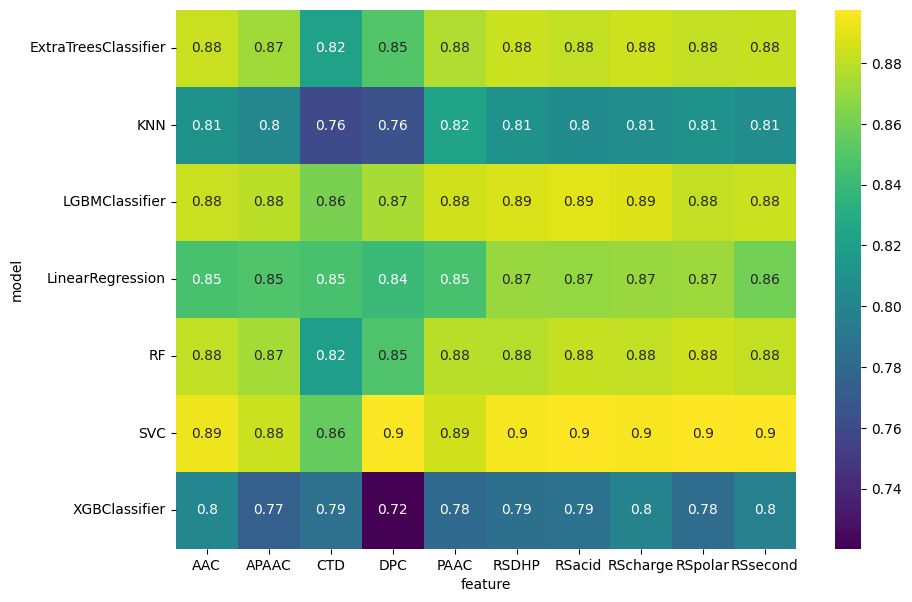

In [63]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(metrics["f1"].unstack(), annot=True,cmap=sns.color_palette("viridis", as_cmap=True),ax=ax)